In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
import re
import pandas as pd
import joblib
import numpy as np




In [3]:

# dataset_dir = 'sentiment140'
dataset_dir = 'imdb'
# dataset_dir = 'coronaNLP'

# n_gram = (1, 1)
# n_gram = (1, 2)
n_gram = (2, 2)

# importing the processed dataframe
df = joblib.load(f'./dataframes/df_{dataset_dir}.pkl')

df.head()




,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product br br film techniqu veri ...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


In [4]:


X = df.iloc[:, 0]


y = df.iloc[:, 1]

X, y



(0        one review mention watch 1 oz episod youll hoo...
 1        wonder littl product br br film techniqu veri ...
 2        thought wonder way spend time hot summer weeke...
 3        basic famili littl boy jake think zombi closet...
 4        petter mattei love time money visual stun film...
                                ...                        
 49995    thought movi right good job wasnt creativ orig...
 49996    bad plot bad dialogu bad act idiot direct anno...
 49997    cathol taught parochi elementari school nun ta...
 49998    im go disagre previous comment side maltin one...
 49999    one expect star trek movi high art fan expect ...
 Name: review, Length: 49582, dtype: object,
 0        1
 1        1
 2        1
 3        0
 4        1
         ..
 49995    1
 49996    0
 49997    0
 49998    0
 49999    0
 Name: sentiment, Length: 49582, dtype: int32)

C:\Users\Enes\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sentiment', ylabel='count'>

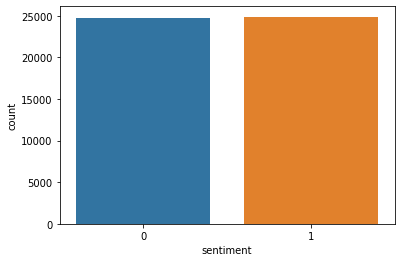

In [5]:

sns.countplot(y)


Text(0.5, 1.0, 'Positive words cloud')

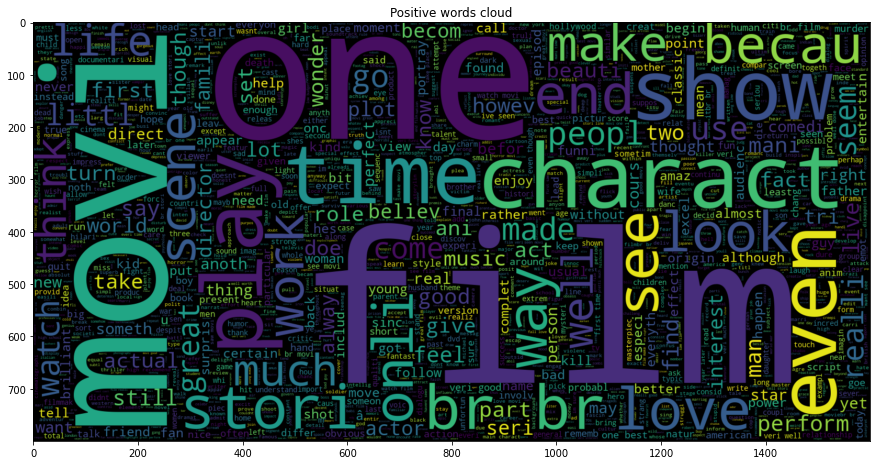

In [6]:

plt.figure(figsize=(15, 15))
options = [1, 2]
cond = df.iloc[:, 1].isin(options)
result = df[cond].iloc[:, 0].values
wc = WordCloud(max_words=2000, width=1600,
               height=800).generate(" ".join(result))
plt.imshow(wc, interpolation='bilinear')
plt.title('Positive words cloud')


In [7]:

if dataset_dir == 'coronaNLP':
    plt.figure(figsize=(15, 15))
    options = [0]
    cond = df.iloc[:, 1].isin(options)
    result = df[cond].iloc[:, 0].values
    wc = WordCloud(max_words=2000, width=1600,
                   height=800).generate(" ".join(result))
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Neutral words cloud')




Text(0.5, 1.0, 'Negative words cloud')

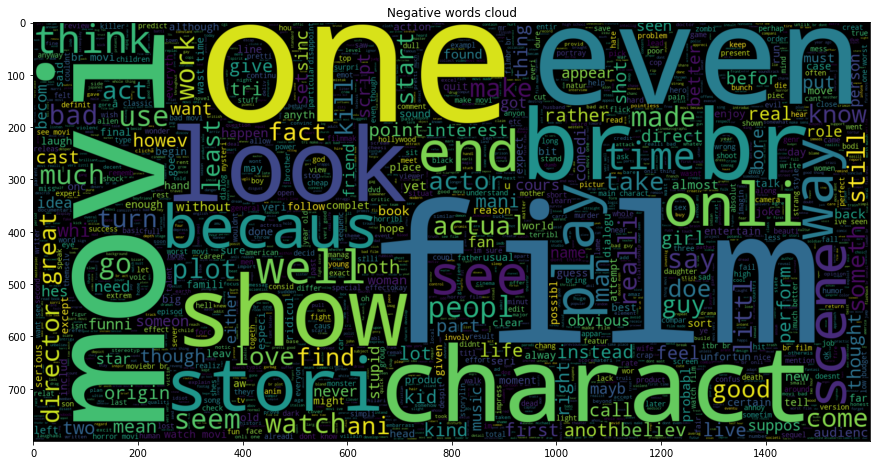

In [8]:

if dataset_dir == 'imdb' or dataset_dir == 'sentiment140':
    options = [0]
else:
    options = [-1, -2]

plt.figure(figsize=(15, 15))
cond = df.iloc[:, 1].isin(options)
result = df[cond].iloc[:, 0].values
wc = WordCloud(max_words=2000, width=1600,
               height=800).generate(" ".join(result))
plt.imshow(wc, interpolation='bilinear')
plt.title('Negative words cloud')




In [9]:


tfidf = joblib.load(
    f"./vectors/vectorizer_{dataset_dir}_{n_gram}.pkl")
tfidf



TfidfVectorizer(max_features=143417, ngram_range=(2, 2),
                tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>)

In [10]:

tfidf.vocabulary_, tfidf.idf_



({'one review': 90573,
  'review mention': 104914,
  'mention watch': 80225,
  'watch 1': 135625,
  'episod youll': 39203,
  'youll hook': 143020,
  'exact happen': 41357,
  'mebr br': 79718,
  'br first': 17046,
  'first thing': 48655,
  'thing struck': 125378,
  'scene violenc': 108451,
  'set right': 112550,
  'right word': 105426,
  'word go': 140069,
  'faint heart': 43229,
  'pull punch': 100237,
  'drug sex': 35210,
  'sex violenc': 112852,
  'wordbr br': 140147,
  'br call': 16634,
  'maximum secur': 79137,
  'focus main': 49274,
  'prison cell': 99109,
  'front face': 50664,
  'never far': 86783,
  'awaybr br': 10013,
  'br would': 18338,
  'would say': 141553,
  'say main': 107409,
  'main appeal': 76661,
  'show due': 113897,
  'due fact': 35278,
  'goe show': 54641,
  'show wouldnt': 114359,
  'wouldnt dare': 141708,
  'pretti pictur': 98940,
  'pictur paint': 95532,
  'mainstream audienc': 76746,
  'mess around': 80282,
  'around first': 8351,
  'first episod': 48406,
  'e

In [11]:


X = tfidf.transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape



((39665, 143417), (39665,))

In [39]:


# creating our pipeline that will return an estimator
pipeline = Pipeline([('clf', LogisticRegression())])




In [40]:


parameters = {
    'clf__penalty': ('l2', 'none'),
    'clf__C': np.logspace(-4, 4, 10),
    'clf__solver': ('sag', 'saga', 'newton-cg'),
    'clf__max_iter': (100, 1000, 2500, 5000)
}

clf = GridSearchCV(pipeline, param_grid=parameters,
                   scoring='accuracy', cv=3, verbose=True)
clf



GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', LogisticRegression())]),
             param_grid={'clf__C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'clf__max_iter': (100, 1000, 2500, 5000),
                         'clf__penalty': ('l2', 'none'),
                         'clf__solver': ('sag', 'saga', 'newton-cg')},
             scoring='accuracy', verbose=True)

In [41]:


clf = clf.fit(X_train, y_train)


clf.best_estimator_

Fitting 3 folds for each of 240 candidates, totalling 720 fits


C:\Users\Enes\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\Enes\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\Enes\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
C:\Users\Enes\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\Enes\AppData\Local\Programs\Python\Python37\lib\site-

In [ ]:


y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))



In [ ]:


print("Best: %f using %s" % (clf.best_score_,
                             clf.best_params_))
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))




In [ ]:



print(confusion_matrix(y_test, y_pred))

acc = int(accuracy_score(y_test, y_pred)*100)




In [ ]:

test_tweet = "groceri store"
vector = tfidf.transform([test_tweet])

print(clf.predict(vector))




In [ ]:


# exporting the pipeline
joblib.dump(clf.best_estimator_,
            f'./models/lrg_{dataset_dir}_{acc}_{n_gram}.pkl')
